Comparando a Acurácia dos Algoritmos de Regressão Logistica e KMeans

In [9]:

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from sklearn import tree
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

In [16]:
#carregando o dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
data = pd.read_csv(url)
data.columns=['age','workclass','fnlwgt','education','educationNum','maritalStatus','occupation','relationship','race','sex','capitalGain',' capitalLoss','hoursPerWeek','nativeCountry', 'target']


In [17]:
#verificando a estrutura do dataset carregado
data.head()

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [18]:
#verificando o domínio e dados carregado
data.describe

<bound method NDFrame.describe of        age          workclass  fnlwgt      education  educationNum  \
0       50   Self-emp-not-inc   83311      Bachelors            13   
1       38            Private  215646        HS-grad             9   
2       53            Private  234721           11th             7   
3       28            Private  338409      Bachelors            13   
4       37            Private  284582        Masters            14   
5       49            Private  160187            9th             5   
6       52   Self-emp-not-inc  209642        HS-grad             9   
7       31            Private   45781        Masters            14   
8       42            Private  159449      Bachelors            13   
9       37            Private  280464   Some-college            10   
10      30          State-gov  141297      Bachelors            13   
11      23            Private  122272      Bachelors            13   
12      32            Private  205019     Assoc-acdm    

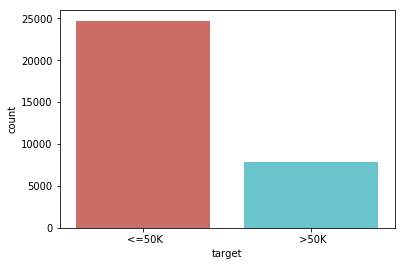

In [9]:
#verificando a quantidade de classe e a proporcao dos dados
sb.countplot(x='target',data=data, palette='hls')
#a quantidade de instancias classificados como <=50k e quase tres vezes maiores que a quantidade de instancias classificadas
#como >=50k

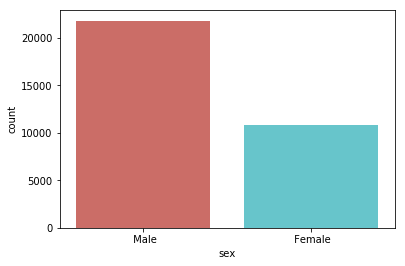

In [10]:
#verificando a quantidade de homens/mulheres e a proporcao dos dados
sb.countplot(x='sex',data=data, palette='hls')
#a quantidade de instancias classificados como Male (Homens) sao quase duas vezes maiores que a quantidade de instancias classificadas
#como Female (Mulheres)

In [11]:
#verificando se existem dados nulos
data.isnull().sum()

age              0
workclass        0
fnlwgt           0
education        0
educationNum     0
maritalStatus    0
occupation       0
relationship     0
race             0
sex              0
capitalGain      0
 capitalLoss     0
hoursPerWeek     0
nativeCountry    0
target           0
dtype: int64

In [12]:
#verificando os tipos de dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
age              32560 non-null int64
workclass        32560 non-null object
fnlwgt           32560 non-null int64
education        32560 non-null object
educationNum     32560 non-null int64
maritalStatus    32560 non-null object
occupation       32560 non-null object
relationship     32560 non-null object
race             32560 non-null object
sex              32560 non-null object
capitalGain      32560 non-null int64
 capitalLoss     32560 non-null int64
hoursPerWeek     32560 non-null int64
nativeCountry    32560 non-null object
target           32560 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [13]:
print("existem dados nao numericos")

existem dados nao numericos


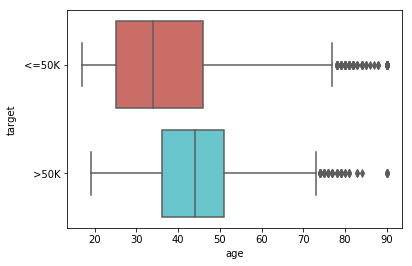

In [171]:
#verificando a relacao entre entre idade e a classe
sb.boxplot(x='age', y='target', data=data, palette='hls')

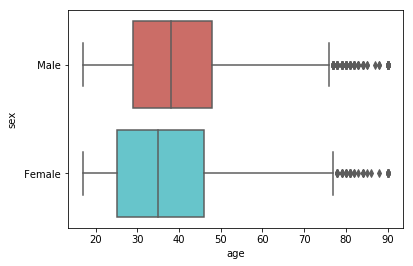

In [20]:
#verificando a relacao entre entre sexo e a classe
sb.boxplot(x='age', y='sex', data=data, palette='hls')

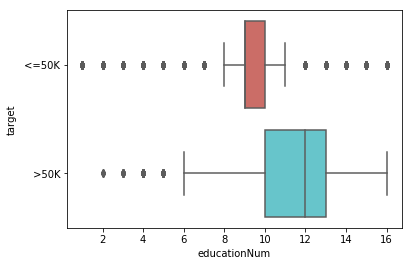

In [21]:
#verificando a relacao entre entre educationNum e a classe
sb.boxplot(x='educationNum', y='target', data=data, palette='hls')

In [22]:
#Como os atributos sex  e target estao definidos utilizando caracter vamos converter para numerico
v_sex              = pd.get_dummies(data['sex'],drop_first=True)
v_target           = pd.get_dummies(data['target'],drop_first=True)

#removendo as colunas que nao serao utilizadas no modelo de classificacao
#tais atributos foram desconsiderados em virtude de que poderia levar o modelo a inferir que 
#a raca e um fator determinante para a renda. De acordo com o problema apresentado tal atributo nao
#tem implicacao direto podendo tornar o algoritmo "racista"
data.drop(['workclass','fnlwgt','education','maritalStatus','occupation','relationship','race','sex', 'nativeCountry','target'],axis=1,inplace=True)
data.head


<bound method NDFrame.head of        age  educationNum  capitalGain   capitalLoss  hoursPerWeek
0       50            13            0             0            13
1       38             9            0             0            40
2       53             7            0             0            40
3       28            13            0             0            40
4       37            14            0             0            40
5       49             5            0             0            16
6       52             9            0             0            45
7       31            14        14084             0            50
8       42            13         5178             0            40
9       37            10            0             0            80
10      30            13            0             0            40
11      23            13            0             0            30
12      32            12            0             0            50
13      40            11            0         

In [23]:
#atribuindo as colunas sex e target alteradas anteriormente
data_dmy = pd.concat([data,v_sex,v_target],axis=1)
data_dmy.head()

,age,educationNum,capitalGain,capitalLoss,hoursPerWeek,Male,>50K
0,50,13,0,0,13,1,0
1,38,9,0,0,40,1,0
2,53,7,0,0,40,1,0
3,28,13,0,0,40,0,0
4,37,14,0,0,40,0,0


In [24]:
#definindo os atributos age,educationNum,capitalGain,capitalLoss,hoursPerWeek,Sex como atributos de entrada
x = data_dmy.iloc[:,[0,1,2,3,4,5]].values
#definindo o target como saida do modelo
y = data_dmy.iloc[:,6].values

In [25]:
#separando 70% dos dados para treinamento e 30% para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state=25)


In [26]:
#treinamento
reg_log = LogisticRegression()

reg_log.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
reg_log.coef_

array([[3.37238003e-02, 2.83490710e-01, 2.99768268e-04, 6.92399484e-04,
        2.55410873e-02, 1.06428050e+00]])

In [28]:
reg_log.intercept_

array([-7.60775413])

In [29]:
#teste do modelo
classifield = reg_log.predict(x_test)
classifield

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

In [30]:
from sklearn.metrics import accuracy_score
#verificando a acuracia do modelo proposto
print ('acuracia: com regressao logistica')
accuracy_score(y_test, classifield) * 100

acuracia: com regressao logistica


82.1969696969697

In [31]:
#verificando 
print(classification_report(y_test, classifield))

             precision    recall  f1-score   support

          0       0.83      0.95      0.89      7394
          1       0.74      0.41      0.53      2374

avg / total       0.81      0.82      0.80      9768



In [32]:
print ('aparentemente devido ao desbalanceamento do conjunto de treino o modelo ficou com tendencia para a classe 0 quando utilizado regressao logistica')

aparentemente devido ao desbalanceamento do conjunto de treino o modelo ficou com tendencia para a classe 0 quando utilizado regressao logistica


In [33]:
print('Testando com KMN....')
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_train, y_train)

Testando com KMN....


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [34]:
y_pred = neigh.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score
#verificando a acuracia do modelo proposto
print ('acuracia com kmn')
accuracy_score(y_test, y_pred) * 100

acuracia com kmn


82.64742014742015

In [36]:

#verificando 
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.87      0.91      0.89      7394
          1       0.66      0.58      0.62      2374

avg / total       0.82      0.83      0.82      9768



In [37]:
print('Quando comparado a acurácia, os dois modelos (regressão logística e kmn) tiveram desempenho semelhante, porem o kmn foi 0,2% melhor.')

Quando comparado a acurácia, os dois modelos (regressão logística e kmn) tiveram desempenho semelhante, porem o kmn foi 0,2% melhor.


In [38]:
print('A média de precisão foi de 81% para regressão logística e 83% para KMN')

A média de precisão foi de 81% para regressão logística e 83% para KMN


In [39]:
print('Considerando o recall, podemos dizer que o modelo com KMN foi melhor pois tem uma média de 83% enquanto na regressão logística temos uma média de 82%. Isso porque o KMN é menos sensível ao desbalanceamento do conjunto de treinamento.\n')
print('Comparando o f1-score temos que na média o KMN foi 1% melhor')

Considerando o recall, podemos dizer que o modelo com KMN foi melhor pois tem uma média de 83% enquanto na regressão logística temos uma média de 82%. Isso porque o KMN é menos sensível ao desbalanceamento do conjunto de treinamento.

Comparando o f1-score temos que na média o KMN foi 1% melhor


In [40]:
print('Assim, com os atributos utilizados e conjunto de treinamento para este problema é melhor utilizar o KMN')

Assim, com os atributos utilizados e conjunto de treinamento para este problema é melhor utilizar o KMN
